In [ ]:
import numpy as np

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.python.framework.ops import disable_eager_execution
disable_eager_execution()

# Load pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.


102967424/102967424 [==============================] - 1s 0us/step


In [ ]:
print(model.summary())

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [ ]:
img_path = '/content/cat.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)

In [ ]:
print(x)

[[[114.  81.  74.]
  [113.  80.  75.]
  [115.  81.  79.]
  ...
  [211. 226. 245.]
  [210. 225. 244.]
  [208. 223. 244.]]

 [[115.  80.  74.]
  [115.  80.  74.]
  [115.  80.  76.]
  ...
  [212. 228. 244.]
  [211. 226. 245.]
  [209. 224. 243.]]

 [[115.  80.  74.]
  [113.  78.  72.]
  [111.  76.  72.]
  ...
  [212. 228. 244.]
  [211. 226. 245.]
  [209. 224. 245.]]

 ...

 [[ 56.  53.  46.]
  [ 24.  23.  19.]
  [ 21.  20.  18.]
  ...
  [ 86.  74.  74.]
  [ 90.  76.  75.]
  [ 87.  71.  71.]]

 [[ 79.  77.  65.]
  [ 49.  46.  39.]
  [ 23.  24.  19.]
  ...
  [ 86.  76.  77.]
  [ 85.  73.  73.]
  [ 85.  71.  71.]]

 [[109. 102.  92.]
  [ 65.  61.  50.]
  [ 41.  38.  31.]
  ...
  [ 83.  77.  77.]
  [ 85.  73.  75.]
  [ 83.  71.  73.]]]


In [ ]:
tf.keras.applications.resnet50.preprocess_input(
    x, data_format=None
)

array([[[ -29.939003,  -35.779   ,   -9.68    ],
        [ -28.939003,  -36.779   ,  -10.68    ],
        [ -24.939003,  -35.779   ,   -8.68    ],
        ...,
        [ 141.061   ,  109.221   ,   87.32    ],
        [ 140.061   ,  108.221   ,   86.32    ],
        [ 140.061   ,  106.221   ,   84.32    ]],

       [[ -29.939003,  -36.779   ,   -8.68    ],
        [ -29.939003,  -36.779   ,   -8.68    ],
        [ -27.939003,  -36.779   ,   -8.68    ],
        ...,
        [ 140.061   ,  111.221   ,   88.32    ],
        [ 141.061   ,  109.221   ,   87.32    ],
        [ 139.061   ,  107.221   ,   85.32    ]],

       [[ -29.939003,  -36.779   ,   -8.68    ],
        [ -31.939003,  -38.779   ,  -10.68    ],
        [ -31.939003,  -40.779   ,  -12.68    ],
        ...,
        [ 140.061   ,  111.221   ,   88.32    ],
        [ 141.061   ,  109.221   ,   87.32    ],
        [ 141.061   ,  107.221   ,   85.32    ]],

       ...,

       [[ -57.939003,  -63.779   ,  -67.68    ],
        [ -

In [ ]:
import matplotlib.pyplot as plt


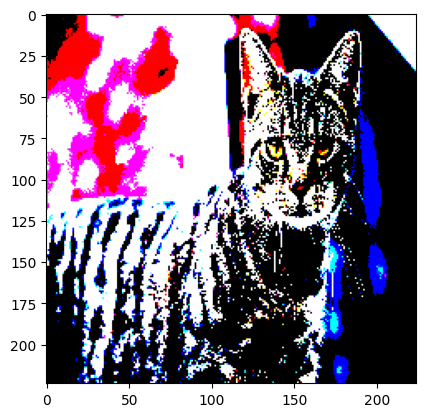

In [ ]:
plt.imshow(x)

In [ ]:
x = tf.expand_dims(x, axis=0)

In [ ]:
preds = tf.keras.applications.resnet50.decode_predictions

In [ ]:
def get_imagenet_label(probs):
  return decode_predictions(probs, top=1)[0][0]

In [ ]:
image_probs = model.predict(x, steps=1)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


35363/35363 [==============================] - 0s 0us/step


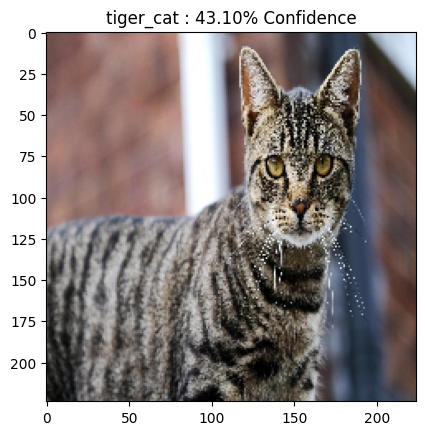

In [ ]:
plt.figure()
_, image_class, class_confidence = get_imagenet_label(image_probs)
plt.title('{} : {:.2f}% Confidence'.format(image_class, class_confidence*100))
plt.imshow(img)

In [ ]:
# loss_object = tf.keras.losses.CategoricalCrossentropy()

# def create_adversarial_pattern(input_image, input_label):
#   loss_values = []
#   with tf.GradientTape() as tape:
#     tape.watch(input_image)
#     prediction = model(input_image)
#     loss = loss_object(input_label, prediction)
#     loss_values.append(input_label-prediction)

#   # Get the gradients of the loss w.r.t to the input image.
#   gradient = tape.gradient(loss, input_image)
#   # Get the sign of the gradients to create the perturbation
#   signed_grad = tf.sign(gradient)
#   return signed_grad

In [ ]:
# Get the input label of the image.
# i = 208
# label = tf.one_hot(i, image_probs.shape[-1])
# label = tf.reshape(label, (1, image_probs.shape[-1]))

# perturbations = create_adversarial_pattern(x, label)

In [ ]:
from keras import models

layer_outputs = [layer.output for layer in model.layers[:177]][1:]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(x, steps=1)

<ipython-input-17-1de043c5a970>:31: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.imshow(display_grid, aspect='auto', cmap='viridis')
/usr/local/lib/python3.10/dist-packages/matplotlib/_tight_bbox.py:64: RuntimeWarning: divide by zero encountered in scalar divide
  fig.patch.set_bounds(x0 / w1, y0 / h1,
/usr/local/lib/python3.10/dist-packages/matplotlib/_tight_bbox.py:65: RuntimeWarning: divide by zero encountered in scalar divide
  fig.bbox.width / w1, fig.bbox.height / h1)
/usr/local/lib/python3.10/dist-packages/matplotlib/patches.py:739: RuntimeWarning: invalid value encountered in scalar add
  y1 = self.convert_yunits(self._y0 + self._height)
/usr/local/lib/python3.10/dist-packages/matplotlib/transforms.py:2042: RuntimeWarning: invalid value encountered in scalar add
  self._mtx[1, 2] += ty


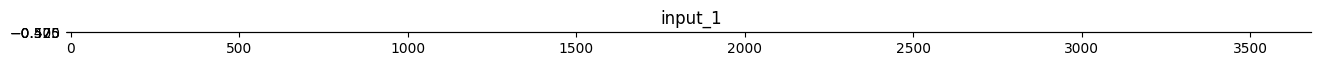

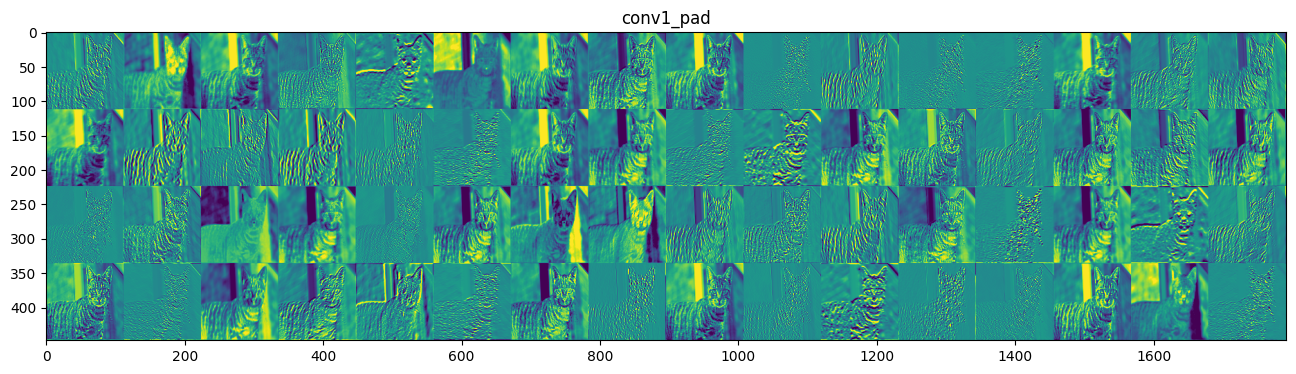

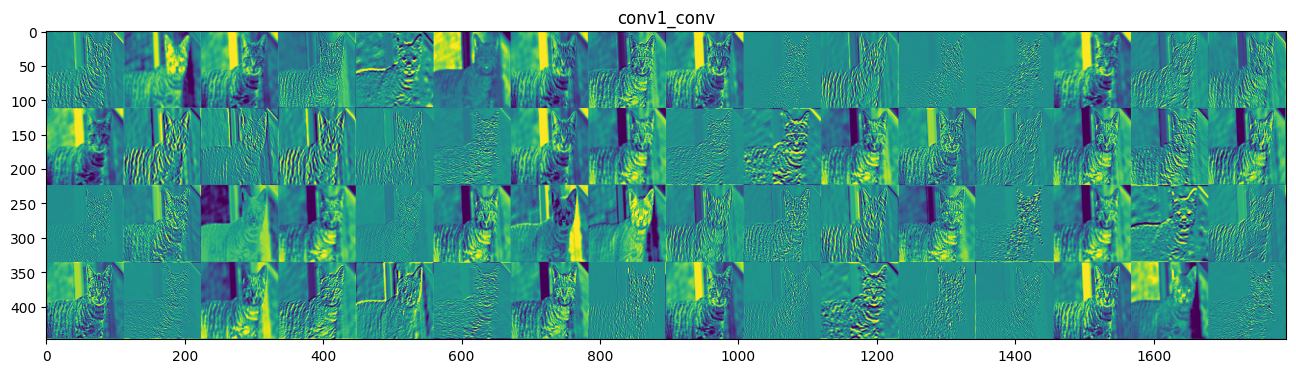

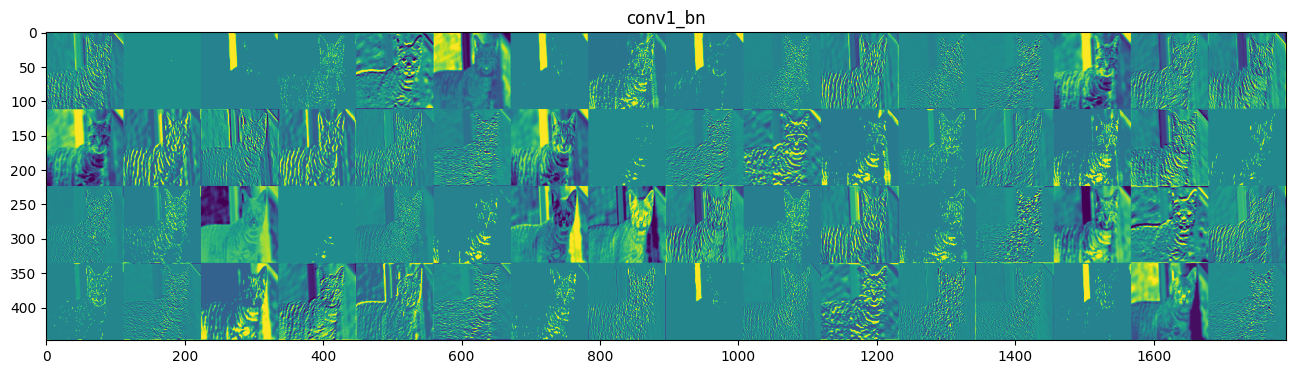

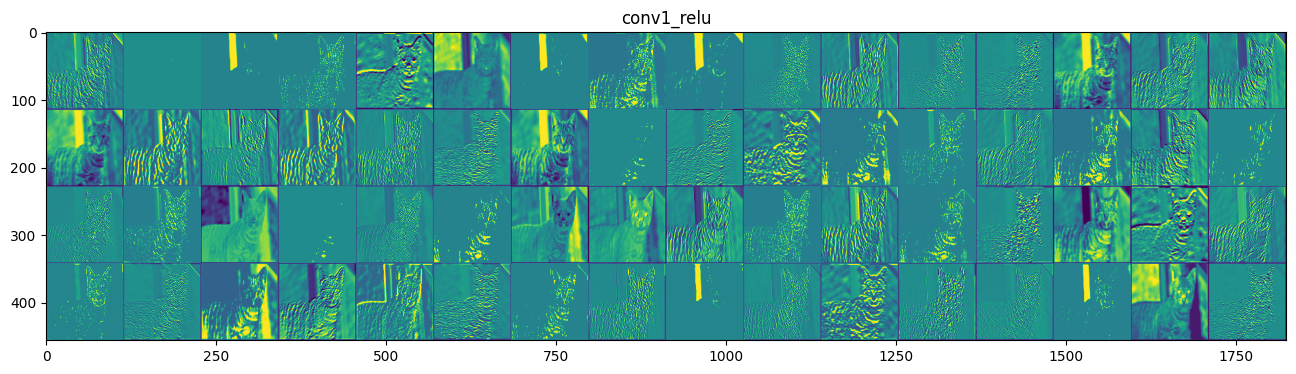

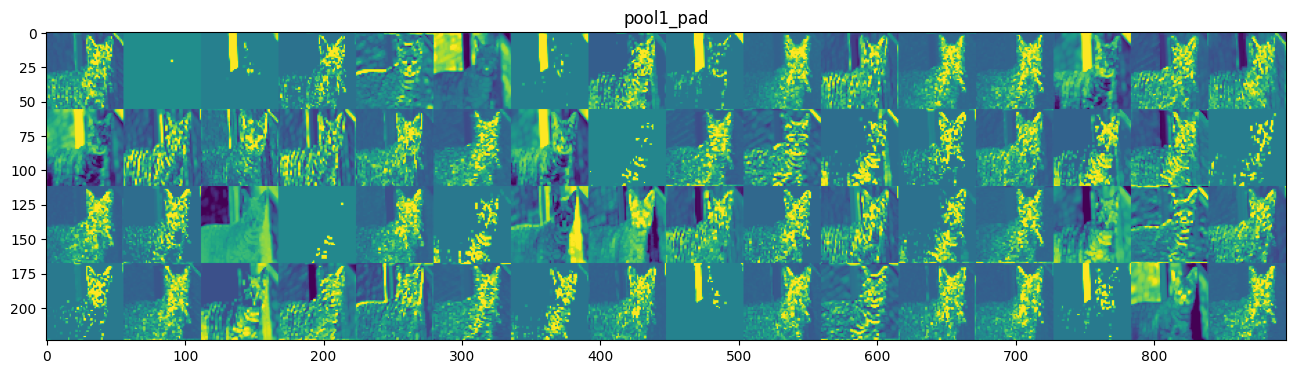

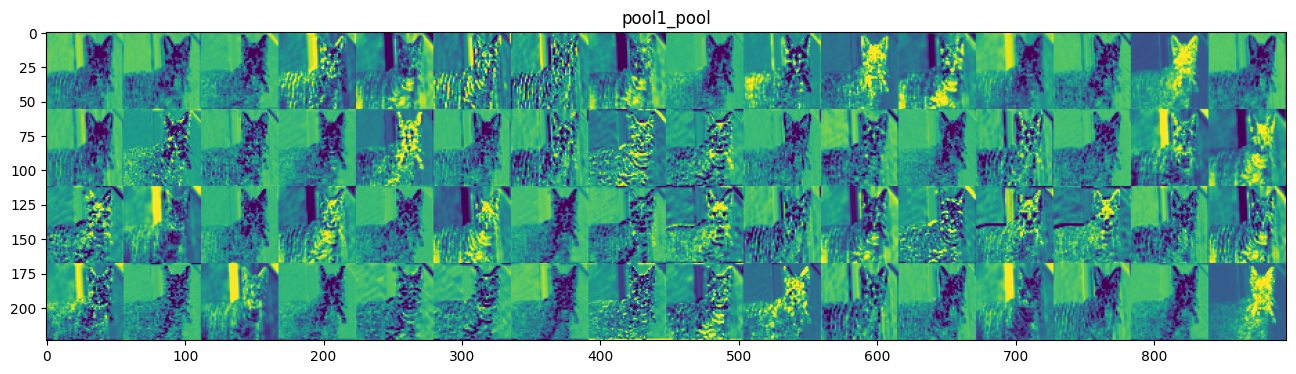

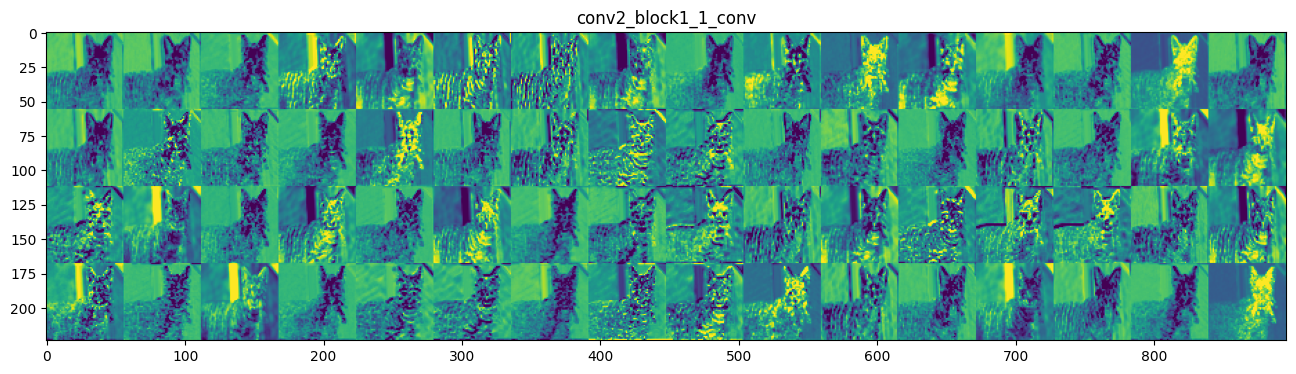

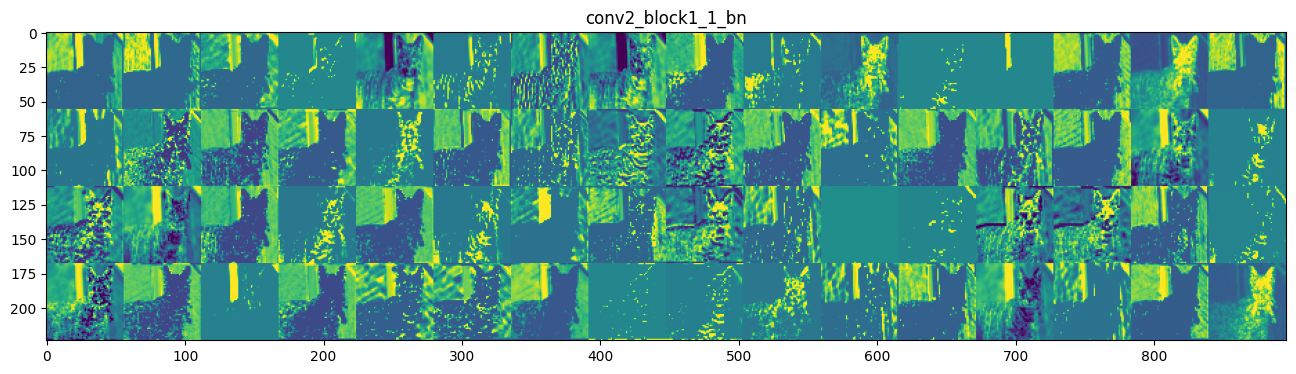

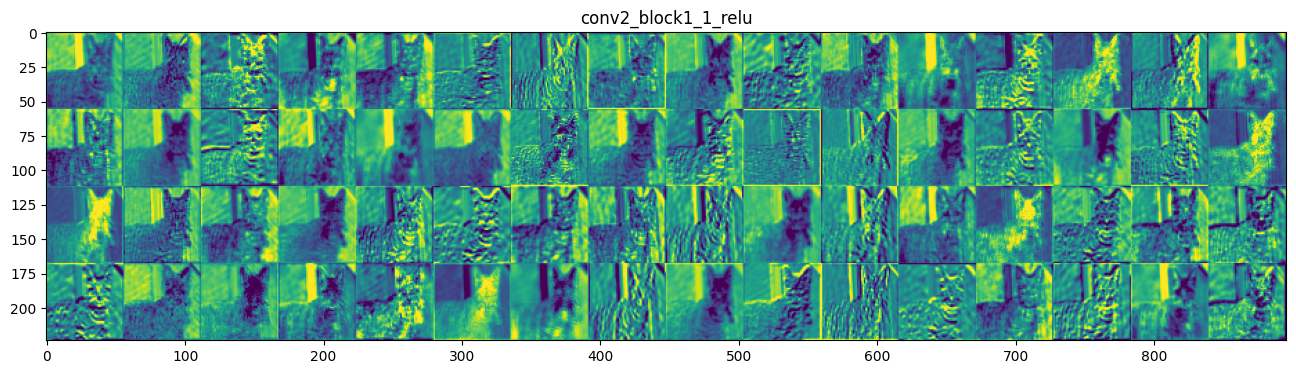

In [ ]:
layer_names = []
for layer in model.layers[:10]: #10 could be 177
  layer_names.append(layer.name)

images_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
  n_features = layer_activation.shape[-1]
  size = layer_activation.shape[1]
  n_cols = n_features // images_per_row
  display_grid = np.zeros((size*n_cols, images_per_row*size))

  for col in range(n_cols):
    for row in range(images_per_row):
      channel_image = layer_activation[
          0, :, :, col*images_per_row + row
      ]
      channel_image -= channel_image.mean()
      channel_image /= channel_image.std()
      channel_image*=64
      channel_image += 128
      channel_image = np.clip(channel_image, 0, 255).astype('uint8')
      display_grid[col*size : (col+1)*size,
                   row*size : (row+1)*size] = channel_image

  scale = 1./size
  plt.figure(figsize=(scale * display_grid.shape[1],
                      scale * display_grid.shape[0]))
  plt.title(layer_name)
  plt.grid(False)
  plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
#i want to maximise the difference between the adv_x activation and x activation
# x activation : activations = activation_model.predict(x, steps=1)
# and then choosing a unit, activations[20][0][0][0] maybe?
# adv_x activation : adv_activations = activation_model.predict(adv_x, steps=1)


In [ ]:
# adv_x = x + i*perturbations

In [ ]:
# x_act = activation_model.predict(x, steps=1)
# x_act_val = x_act[20][0][0][0]

# advx_act = activation_model.predict(adv_x, steps=1)
# advx_act_val = advx_act[20][0][0][0]

In [ ]:
tf.experimental.numpy.experimental_enable_numpy_behavior()

In [ ]:
loss_object = tf.keras.losses.CategoricalCrossentropy()

def create_adversarial_pattern(input_image, input_label):
  with tf.GradientTape() as tape:
    tape.watch(input_image)
    prediction = model(input_image)
    loss = loss_object(input_label, prediction)

  # Get the gradients of the loss w.r.t to the input image.
  gradient = tape.gradient(loss, input_image)
  # Get the sign of the gradients to create the perturbation
  signed_grad = tf.sign(gradient)
  return signed_grad

In [ ]:
# my code
actlist = []
epslist = []

def control_activation(x, target_ratio, unit, input_label):
  # x : image
  # target_ratio : ratio by which to reduce activation
  # unit : unit of the resnet50 where we want to control activation
  x_act = activation_model.predict(x, steps=1)
  x_act_val = max(x_act[unit][0][0][0])
  print(x_act_val)
  target_act = x_act_val * target_ratio
  print(target_act)

  adv_x = tf.identity(x)
  adv_x_act = activation_model.predict(adv_x, steps=1)
  adv_x_act_val = max(adv_x_act[unit][0][0][0])
  print(adv_x_act_val)

  eps = 0.0001
  perturbation = create_adversarial_pattern(x, input_label)
  while (adv_x_act_val - target_act) > 0.01:
    change = abs(adv_x_act_val - target_act)
    eps += change*eps

    adv_x = x + eps*perturbation

    adv_x_act = activation_model.predict(adv_x, steps=1)
    adv_x_act_val1 = max(adv_x_act[unit][0][0][0])
    if(adv_x_act_val1 - target_act)<change:
      adv_x_act_val = adv_x_act_val1
      print("---")
      print("adversarial activation ", adv_x_act_val)
      print("eps ", eps)
      if(eps>20):
        break
      epslist.append(eps)
      actlist.append(adv_x_act_val)

    else:
      continue
  return eps, epslist, actlist


In [ ]:
i = 208
label = tf.one_hot(i, image_probs.shape[-1])
label = tf.reshape(label, (1, image_probs.shape[-1]))
eps, epslist, actlist = control_activation(x, 0.9, 25, label)

4.6042547
4.143829250335694
4.6042547
---
adversarial activation  4.6042337
eps  0.027602205026710333
---
adversarial activation  4.602833
eps  0.39107125674486287
---
adversarial activation  4.597554
eps  0.5705743494900983
---
adversarial activation  4.5712986
eps  0.8294581713996131
---
adversarial activation  4.5166864
eps  1.1840261158737866
---
adversarial activation  4.4335995
eps  1.6254987653523838
---
adversarial activation  4.2911377
eps  2.096519902978208
---
adversarial activation  4.15102
eps  2.4053549897488526


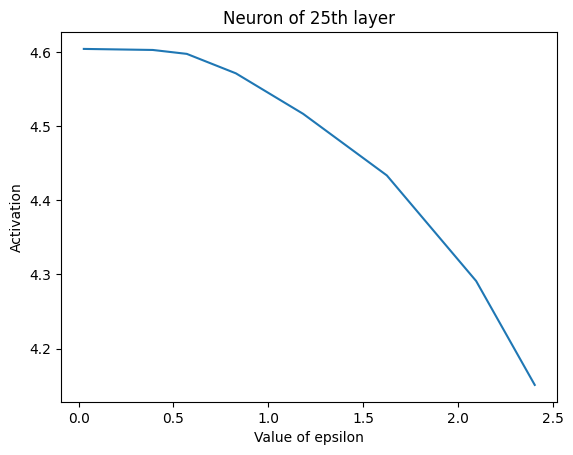

In [ ]:
import matplotlib.pyplot as plt
plt.plot(epslist, actlist)
plt.xlabel("Value of epsilon")
plt.ylabel("Activation")
plt.title('Neuron of 25th layer')
plt.show()

In [ ]:
epslist2 = []
actlist2 = []
eps25, epslist2, actlist2 = control_activation(x, 0.8, 25, label)

4.6042547
3.683403778076172
4.6042547
---
adversarial activation  4.6042414
eps  0.034347778051509056
---
adversarial activation  4.6042194
eps  0.06597650332005907
---
adversarial activation  4.6031666
eps  0.46756969710676133
---
adversarial activation  4.5654545
eps  0.8976229119059569
---
adversarial activation  4.422059
eps  1.6893718341373125
---
adversarial activation  3.9026067
eps  2.937235261108504
---
adversarial activation  3.654549
eps  3.581085888186834


In [ ]:
def display_images(image):
  _, label, confidence = get_imagenet_label(model.predict(image, steps=1))
  plt.figure()
  plt.imshow(image[0]*0.5+0.5)
  # plt.title('{} \n {} : {:.2f}% Confidence'.format(description,
  #                                                  label, confidence*100))
  plt.show()

In [ ]:
!pip install numpy==1.19.5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 45.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  error: subprocess-exited-with-error
  
  × Building wheel for numpy (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for numpy
Failed to build numpy
ERROR: Could not build wheels for numpy, which is required to install pyproject.toml-based projects


In [ ]:
perturbation = create_adversarial_pattern(x, label)

e = 3.581085888186834
adv_x = x + e*perturbation
print(adv_x)

Tensor("add_259:0", shape=(1, 224, 224, 3), dtype=float32)


NotImplementedError: Cannot convert a symbolic tf.Tensor (add_260:0) to a numpy array. This error may indicate that you're trying to pass a Tensor to a NumPy call, which is not supported.

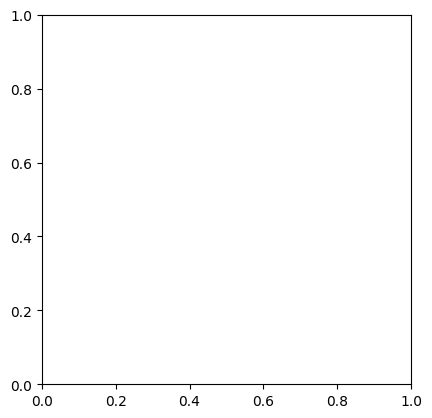

In [ ]:
adv_x = tf.clip_by_value(adv_x, -1, 1)
display_images(adv_x)

In [ ]:
# import matplotlib.pyplot as plt
# plt.plot(epslist2, actlist2)
# plt.xlabel("Value of epsilon")
# plt.ylabel("Activation")
# plt.title('Neuron of 25th layer')
# plt.show()

In [ ]:
epslist3 = []
actlist3 = []
eps3, epslist3, actlist3 = control_activation(x, 0.9, 100, label)

6.949269
6.254341936111451
6.949269
---
adversarial activation  6.949085
eps  0.0001694926881790161
---
adversarial activation  6.948951
eps  0.00028724659760296126
---
adversarial activation  6.9487286
eps  0.0004867706210892
---
adversarial activation  6.9483495
eps  0.0008247776299576063
---
adversarial activation  6.9476976
eps  0.0013971795237646154
---
adversarial activation  6.9466076
eps  0.002365921915176071
---
adversarial activation  6.9447308
eps  0.004003768396176199
---
adversarial activation  6.941293
eps  0.006767925344997374
---
adversarial activation  6.934887
eps  0.011417157255414269
---
adversarial activation  6.9229317
eps  0.019187046497118228
---
adversarial activation  6.903262
eps  0.032015308830656425
---
adversarial activation  6.8717666
eps  0.05279068951231024
---
adversarial activation  6.830765
eps  0.08538496151095412
---
adversarial activation  6.775094
eps  0.13460280303992256
---
adversarial activation  6.701174
eps  0.2046974948741473
---
adversaria

In [ ]:
epslist3 = []
actlist3 = []
eps3, epslist3, actlist3 = control_activation(x, 0.75, 100, label)

6.949269
5.2119516134262085
6.949269
---
adversarial activation  6.9489703
eps  0.0002737317204475403
---
adversarial activation  6.948431
eps  0.0007492088388564427
---
adversarial activation  6.9469585
eps  0.002050194555018648
---
adversarial activation  6.942791
eps  0.005607296312633979
---
adversarial activation  6.928884
eps  0.01531262553922376
---
adversarial activation  6.888396
eps  0.04160336870100799
---
adversarial activation  6.8010335
eps  0.11134909373112532
---
adversarial activation  6.601611
eps  0.2882919213156591
---
adversarial activation  6.222414
eps  0.6889195354538242
---
adversarial activation  5.9627523
eps  1.3850468249270405
---
adversarial activation  5.4023013
eps  13.01401583814248
---
adversarial activation  5.126658
eps  15.491229823568302


In [ ]:
epslist4 = []
actlist4 = []
eps4, epslist4, actlist4 = control_activation(x, 0.5, 40, label)

5.04269
2.5213449001312256
5.04269
---
adversarial activation  3.010008
eps  29.314712802363434


In [ ]:
epslist5 = []
actlist5 = []
eps5, epslist5, actlist5 = control_activation(x, 0.5, 130, label)

9.240592
4.620296001434326
9.240592
---
adversarial activation  9.239152
eps  0.0005620296001434327
---
adversarial activation  9.232494
eps  0.0031579633646498457
---
adversarial activation  9.185914
eps  0.017723116793333937
---
adversarial activation  8.88069
eps  0.09864009851770576
---
adversarial activation  7.413169
eps  0.5188857448730754
---
adversarial activation  6.0340233
eps  1.9680676828992403
---
adversarial activation  5.941123
eps  4.750378661944799
---
adversarial activation  5.7174597
eps  25.586670052828616


KeyboardInterrupt: 

In [ ]:

# def create_adversarial_image(original_image, target_activation, epsilon_start, max_iter, unit):
#   """
#   Creates an adversarial image with a specific activation value.

#   Args:
#     original_image: TensorFlow tensor representing the original image.
#     target_activation: The desired activation value for the adversarial image.
#     epsilon_start: Starting value for the perturbation magnitude.
#     max_iter: Maximum number of iterations.

#   Returns:
#     adversarial_image: TensorFlow tensor representing the adversarial image.
#   """

#   original_activation = activation(original_image, unit)
#   print(original_activation)
#   current_image = original_image
#   print(current_image)
#   current_activation = original_activation

#   for i in range(max_iter):
#     change = target_activation - current_activation



#   return current_image

# adversarial_image = create_adversarial_image(x, target_act, 0.01, 100, 45)



In [ ]:
# print(x)

In [ ]:
# import torch
# import torchvision.models as models
# from torch.autograd import Variable

# # Load the pre-trained model
# model = models.resnet50(pretrained=True)
# model.eval()

# # Define the original image
# original_image = x

# # Define the target neuron
# target_neuron = 2

# # Define the target ratio
# target_ratio = 0.9

# # Initialize epsilon
# epsilon = 0.01

# # Define the maximum number of iterations
# max_iterations = 100

# # Define the tolerance for the activation ratio
# tolerance = 0.01

# # Get the activation of the target neuron for the original image
# original_output = model(tf.convert_to_tensor(original_image))
# original_activation = original_output[0, target_neuron]

# for i in range(max_iterations):
#     # Generate the adversarial image
#     adv_image = original_image + epsilon * torch.sign(original_image.grad.data)

#     # Pass the adversarial image through the model
#     adv_output = model(adv_image)
#     adv_activation = adv_output[0, target_neuron]

#     # Calculate the activation ratio
#     activation_ratio = adv_activation / original_activation

#     # Check if the activation ratio is close to the target ratio
#     if abs(activation_ratio - target_ratio) < tolerance:
#         break

#     # Adjust epsilon based on whether the activation ratio is higher or lower than the target ratio
#     if activation_ratio > target_ratio:
#         epsilon *= 1.1
#     else:
#         epsilon *= 0.9